In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [31]:
bwood = pd.read_csv("bollywood.csv")
bwood
for i in bwood["Genre"]:
    i.lstrip()
bwood

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


## 1)No of records in the data set

In [141]:
bwood["SlNo"].count()

149

## 2)No. of movies in each genre

In [142]:
tally=bwood["Genre"].value_counts()
tally

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

## 3)Genre with highest number of releases

In [143]:
#Comedy

## 4)Crosstab of genre and releasetime

In [145]:
df=pd.crosstab(bwood["ReleaseTime"],bwood["Genre"])
df

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


## 5)Month were maximum movies were released

In [146]:
date = pd.to_datetime(bwood["Release Date"])
frame = pd.to_datetime(date, dayfirst = True)
frame = pd.DataFrame([frame]).transpose()
frame['date']= frame
bwood['month']= frame['date'].dt.month
bwood

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7
...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3


In [147]:
fram=bwood["month"].value_counts()
high = bwood["month"].value_counts().max()
fram = pd.DataFrame([fram]).transpose()
fram['ind']=(fram.index)
count = 1


for i in fram["month"]:
    if(i == high):
        print("month " + str(fram.loc[count].at["ind"]))
        break
    else:
        count = count + 1
        

month 1


## 6)Month with the maximum hig budget movies

In [157]:
highbud = bwood[bwood["Budget"] >= 25]
pd.DataFrame(highbud['month'].value_counts())



,month
2,9
1,8
3,7
8,7
7,6
11,6
6,5
9,5
4,4
10,4


In [ ]:
#Month 2(Feb)

## 7) top 10 movies based on RO1

In [158]:
bwood['ROI'] = (bwood['BoxOfficeCollection'] + bwood['Budget'])/bwood['Budget']
bwood.sort_values(by = ['ROI'], ascending=False).head(10)


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,10.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,12,9.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,9.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,9.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,6,8.240000
58,59,05-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,9,7.933333
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,7.666667
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,7.500000
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,6.466667
115,116,09-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,8,6.266667


##  8)time of high ROI

In [159]:

print("The average ROI of movies released on a normal day is " + str(bwood[bwood.ReleaseTime == 'N'].ROI.mean()))
print("The average ROI of movies released on a long weekend is " + str(bwood[bwood.ReleaseTime == 'LW'].ROI.mean()))
print("The average ROI of movies released on a holiday is " + str(bwood[bwood.ReleaseTime == 'HS'].ROI.mean()))
print("The average ROI of movies released on a festival day is " + str(bwood[bwood.ReleaseTime == 'FS'].ROI.mean()))

print("\nTherefore a movie release on a long weekend has a more ROI than a movie released on a festive day")

The average ROI of movies released on a normal day is 2.6577216305350873
The average ROI of movies released on a long weekend is 3.127205309873797
The average ROI of movies released on a holiday is 2.8508667840873723
The average ROI of movies released on a festival day is 2.9738532013595953

Therefore a movie release on a long weekend has a more ROI than a movie released on a festive day


## 9)Correlation between box office and ytd likes

In [160]:
print(bwood["BoxOfficeCollection"].corr(bwood["YoutubeLikes"]))
print("A moderately strong correlationship. ")

0.6825165877731297
A moderately strong correlationship. 


## 10) Boxplot of ytd likes of various genres of movies

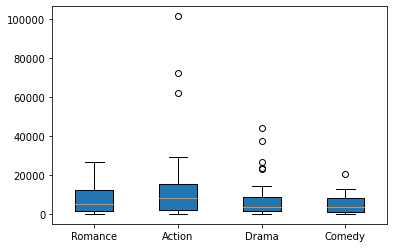

In [161]:
rom = bwood[bwood.Genre == 'Romance']
act = bwood[bwood.Genre == 'Action']
dra = bwood[bwood.Genre == 'Drama']
thri = bwood[bwood.Genre == 'Comedy']
box_plot_data=[rom["YoutubeLikes"],act["YoutubeLikes"],dra["YoutubeLikes"],thri["YoutubeLikes"]]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Romance','Action','Drama','Comedy'])
plt.show()

## 11)Highly correlated set of attributes

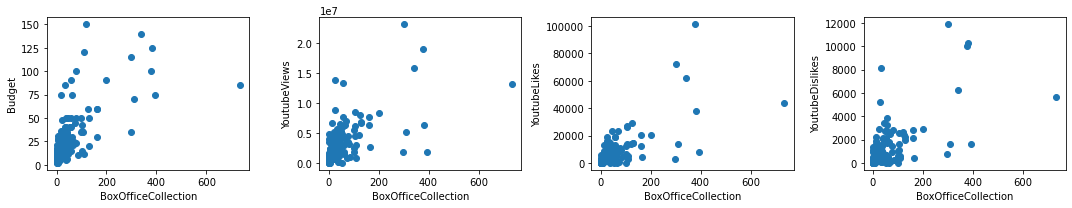

In [162]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,3))

#manipulating the first axes
ax[0].scatter(bwood["BoxOfficeCollection"], bwood["Budget"])
ax[0].set_xlabel("BoxOfficeCollection")
ax[0].set_ylabel("Budget")

ax[1].scatter(bwood["BoxOfficeCollection"],bwood["YoutubeViews"])
ax[1].set_xlabel('BoxOfficeCollection')
ax[1].set_ylabel("YoutubeViews")

ax[2].scatter(bwood["BoxOfficeCollection"],bwood["YoutubeLikes"])
ax[2].set_xlabel('BoxOfficeCollection')
ax[2].set_ylabel("YoutubeLikes")

ax[3].scatter(bwood["BoxOfficeCollection"],bwood["YoutubeDislikes"])
ax[3].set_ylabel('YoutubeDislikes')
ax[3].set_xlabel("BoxOfficeCollection")



plt.tight_layout()



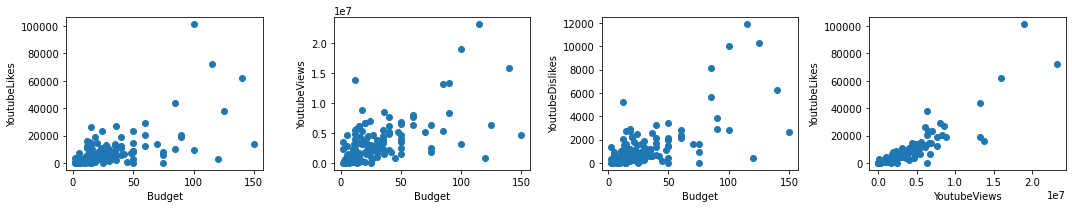

In [163]:
fig,ax=plt.subplots(nrows=1, ncols=4, figsize=(15,3))

ax[0].scatter(bwood["Budget"],bwood["YoutubeLikes"])
ax[0].set_xlabel('Budget')
ax[0].set_ylabel('YoutubeLikes')

ax[1].scatter(bwood["Budget"],bwood["YoutubeViews"])
ax[1].set_xlabel('Budget')
ax[1].set_ylabel("YoutubeViews")

ax[2].scatter(bwood["Budget"],bwood["YoutubeDislikes"])
ax[2].set_xlabel('Budget')
ax[2].set_ylabel("YoutubeDislikes")

ax[3].scatter(bwood["YoutubeViews"],bwood["YoutubeLikes"])
ax[3].set_xlabel('YoutubeViews')
ax[3].set_ylabel("YoutubeLikes")


plt.tight_layout()

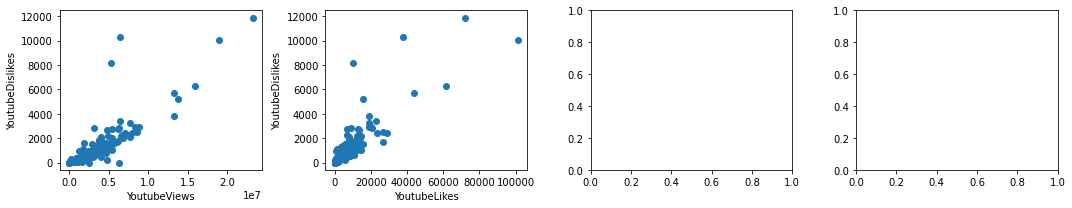

In [167]:
fig, ax=plt.subplots(nrows=1,ncols=4,figsize=(15,3))

ax[0].scatter(bwood["YoutubeViews"],bwood["YoutubeDislikes"])
ax[0].set_xlabel('YoutubeViews')
ax[0].set_ylabel("YoutubeDislikes")

ax[1].scatter(bwood["YoutubeLikes"],bwood["YoutubeDislikes"])
ax[1].set_xlabel('YoutubeLikes')
ax[1].set_ylabel("YoutubeDislikes")

plt.tight_layout()

In [ ]:
#From the graphs, we can observe that the youtubeViews and YoutubeLikes are highly correlated, having an r value of 0.

## 12)Genre and Box office collection 

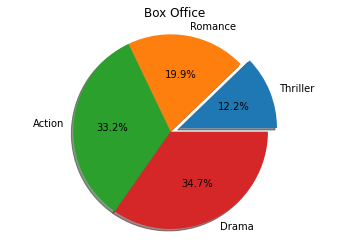

In [168]:
Thr=bwood[bwood['Genre']=='Thriller']["BoxOfficeCollection"].sum()
Rom=bwood[bwood['Genre']=='Romance']["BoxOfficeCollection"].sum()
Act=bwood[bwood['Genre']=='Action']["BoxOfficeCollection"].sum()
Dra=bwood[bwood['Genre']=='Drama']["BoxOfficeCollection"].sum()
Gen=[Thr,Rom,Act,Dra]
my_label='Thriller','Romance','Action','Drama'
plt.pie(Gen,labels=my_label,shadow= True, explode=(0.1,0,0,0),autopct='%1.1f%%')
plt.axis('equal')
plt.title("Box Office")
plt.show()

## 13) Budget and Box Office relationship

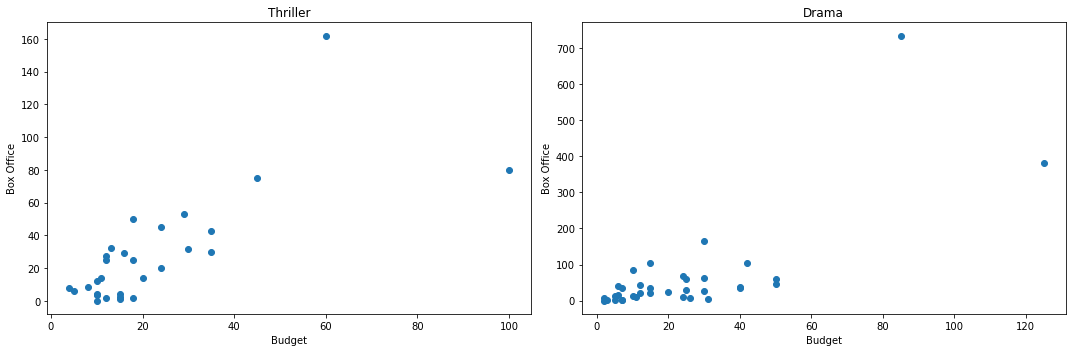

In [171]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5) )


ax[0].scatter(bwood[bwood["Genre"]=='Thriller']['Budget'], bwood[bwood["Genre"]=='Thriller']["BoxOfficeCollection"])
ax[0].set_xlabel('Budget')
ax[0].set_ylabel("Box Office")
ax[0].set_title("Thriller")

ax[1].scatter(bwood[bwood["Genre"]=='Drama']['Budget'],bwood[bwood["Genre"]=='Drama']["BoxOfficeCollection"])
ax[1].set_xlabel('Budget')
ax[1].set_ylabel("Box Office")
ax[1].set_title("Drama")

plt.tight_layout()

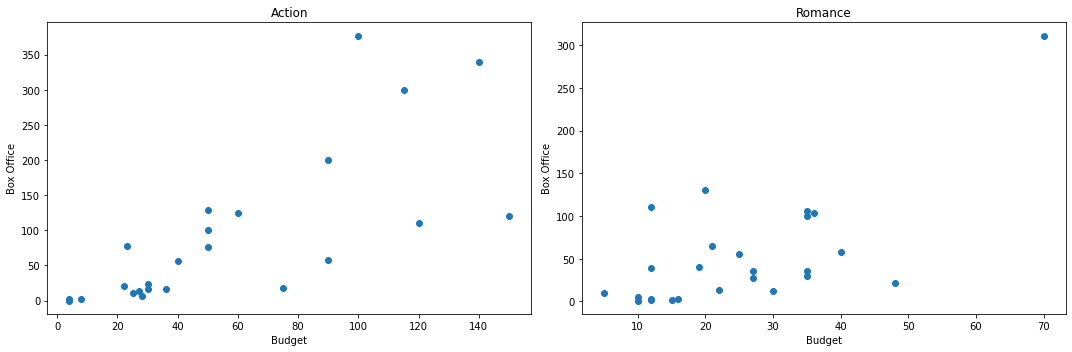

In [172]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].scatter(bwood[bwood["Genre"]=='Action']['Budget'],bwood[bwood["Genre"]=='Action']["BoxOfficeCollection"])
ax[0].set_xlabel('Budget')
ax[0].set_ylabel("Box Office")
ax[0].set_title("Action")

ax[1].scatter(bwood[bwood["Genre"]=='Romance']['Budget'],bwood[bwood["Genre"]=='Romance']["BoxOfficeCollection"])
ax[1].set_xlabel('Budget')
ax[1].set_ylabel("Box Office")
ax[1].set_title("Romance")

plt.tight_layout()

## 14) Distribution of budget across genres 

Text(0, 0.5, 'Number of movies')

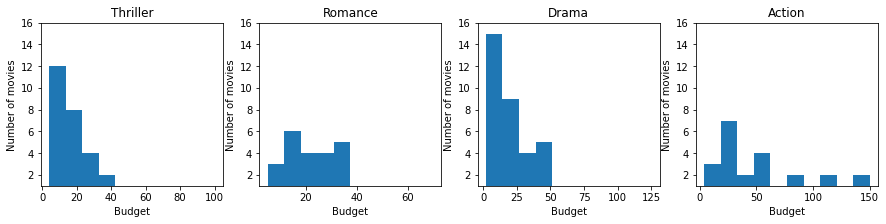

In [173]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,3))

Thr=bwood[bwood['Genre']=='Thriller']["Budget"]
ax[0].hist(Thr,rwidth=1)
ax[0].set_ylim(1, 16)
ax[0].set_title("Thriller")
ax[0].set_xlabel('Budget')
ax[0].set_ylabel('Number of movies')

Rom=bwood[bwood['Genre']=='Romance']["Budget"]
ax[1].set_title("Romance")
ax[1].set_ylim(1, 16)
ax[1].hist(Rom,rwidth=1)
plt.ylim(1, 20)
ax[1].set_xlabel('Budget')
ax[1].set_ylabel('Number of movies')

Thr=bwood[bwood['Genre']=='Drama']["Budget"]
ax[2].hist(Thr,rwidth=1)
ax[2].set_ylim(1, 16) 
ax[2].set_title("Drama")
ax[2].set_xlabel('Budget')
ax[2].set_ylabel('Number of movies')

Rom=bwood[bwood['Genre']=='Action']["Budget"]
ax[3].set_title("Action")
ax[3].set_ylim(1, 16)
ax[3].hist(Rom)
ax[3].set_xlabel('Budget')
ax[3].set_ylabel('Number of movies')


## 15) No. of movies per year

<AxesSubplot:>

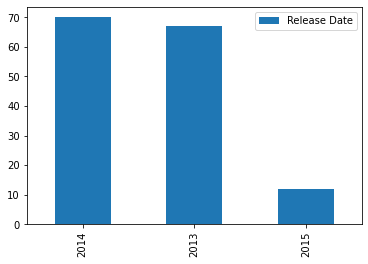

In [174]:
bwood['Release Date']= pd.to_datetime(bwood['Release Date'])
df=pd.DataFrame(bwood['Release Date'].dt.year.value_counts())
df.plot(kind='bar')